In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

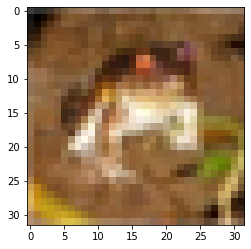

In [6]:
plt.imshow(X_train[0])

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train)

In [12]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [16]:
model = Sequential()
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [19]:
model.fit(x=X_train,y=y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 257us/sample - loss: 1.5187 - acc: 0.4504 - val_loss: 1.2853 - val_acc: 0.5403
Epoch 2/15
50000/50000 [==============================] - 12s 234us/sample - loss: 1.1932 - acc: 0.5785 - val_loss: 1.1301 - val_acc: 0.6074
Epoch 3/15
50000/50000 [==============================] - 12s 231us/sample - loss: 1.0530 - acc: 0.6286 - val_loss: 1.0676 - val_acc: 0.6235
Epoch 4/15
50000/50000 [==============================] - 12s 231us/sample - loss: 0.9420 - acc: 0.6717 - val_loss: 1.0058 - val_acc: 0.6513
Epoch 5/15
50000/50000 [==============================] - 12s 231us/sample - loss: 0.8548 - acc: 0.7032 - val_loss: 0.9790 - val_acc: 0.6661
Epoch 6/15
50000/50000 [==============================] - 12s 234us/sample - loss: 0.7833 - acc: 0.7261 - val_loss: 0.9487 - val_acc: 0.6787
Epoch 7/15
50000/50000 [==============================] - 12s 233us/sample - loss: 0.7140 - acc: 0.7492 

In [0]:
metric = pd.DataFrame(model.history.history)

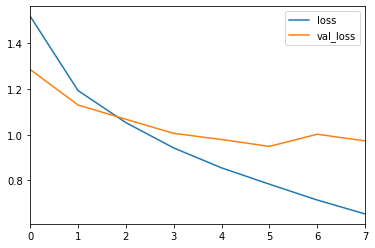

In [21]:
metric[['loss','val_loss']].plot()

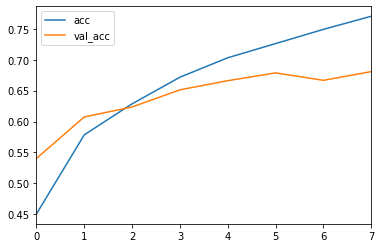

In [22]:
metric[['acc','val_acc']].plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
prediction = model.predict_classes(X_test)

In [30]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1000
           1       0.76      0.85      0.80      1000
           2       0.60      0.53      0.56      1000
           3       0.47      0.51      0.49      1000
           4       0.63      0.66      0.64      1000
           5       0.60      0.56      0.58      1000
           6       0.74      0.77      0.75      1000
           7       0.80      0.70      0.75      1000
           8       0.73      0.81      0.77      1000
           9       0.77      0.72      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [31]:
confusion_matrix(y_test,prediction)

array([[700,  31,  51,  20,  29,   8,   9,   9, 110,  33],
       [ 15, 851,   7,  11,   1,   6,  10,   1,  35,  63],
       [ 55,  12, 529,  90,  94,  81,  73,  23,  29,  14],
       [ 17,  17,  66, 514,  88, 154,  64,  30,  27,  23],
       [ 20,   7,  70,  73, 660,  41,  52,  49,  24,   4],
       [ 12,   6,  55, 210,  53, 560,  34,  46,  16,   8],
       [  7,  15,  55,  73,  32,  25, 769,   9,   7,   8],
       [ 18,   6,  34,  62,  80,  53,  15, 704,   9,  19],
       [ 79,  45,   7,  11,   5,   5,   5,   2, 805,  36],
       [ 38, 136,  10,  22,   8,   7,  13,   9,  41, 716]])

In [35]:
model.predict_classes(X_test[0].reshape(1,32,32,3))

array([3])

In [37]:
y_test[0]

array([3], dtype=uint8)